In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold

plt.style.use('fivethirtyeight')
%matplotlib inline

In [67]:
data_df = pd.read_csv('cleaned_data.csv')

In [68]:
data_df.dropna(inplace=True)

In [69]:
years = data_df.Year.unique()

In [71]:
X = data_df.drop(['Country', 'Year', 'Top_1', '6000'], axis=1)
print(X.shape)
X.head()

(463, 23)


,GDP,1100,1200,1300,2100,2200,2300,2400,4100,4200,...,4600,5100,5110,5111,5120,5121,5200,5300,Top_1_AR1,GDP_change
1,19.840,35.646688,14.974949,0.0,0.0,0.0,0.0,0.0,6.921507,0.0,...,0.0,29.708666,7.069957,0.0,22.638708,15.661533,4.768974,0.0,0.0634,-0.780
2,20.419,36.493289,14.429530,0.0,0.0,0.0,0.0,0.0,6.778523,0.0,...,0.0,29.312081,6.996644,0.0,22.315436,14.983221,4.731544,0.0,0.0616,0.579
3,20.349,35.685333,15.613271,0.0,0.0,0.0,0.0,0.0,6.455487,0.0,...,0.0,28.869539,7.416304,0.0,21.453235,14.157033,4.698994,0.0,0.0625,-0.070
4,20.691,37.413183,15.686018,0.0,0.0,0.0,0.0,0.0,6.041148,0.0,...,0.0,27.781418,7.456428,0.0,20.324990,12.829249,4.403093,0.0,0.0605,0.342
5,21.083,37.326593,16.976252,0.0,0.0,0.0,0.0,0.0,5.925229,0.0,...,0.0,27.792147,7.441806,0.0,20.350341,12.802727,4.173525,0.0,0.0592,0.392


In [72]:
y = data_df.Top_1
y.shape

(463,)

In [73]:
lr = LinearRegression()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# Fit the model against the training data
lr.fit(X_train, y_train)
# Evaluate the model against the testing data
lr.score(X_test, y_test)

0.9634728562926268

In [74]:
X_usa = data_df[data_df['Country'] == 'United States']
X_usa = X_usa.drop(['Country', 'Year', 'Top_1', '6000'], axis=1)
print(X_usa.shape)
X_usa.head()

(48, 23)


,GDP,1100,1200,1300,2100,2200,2300,2400,4100,4200,...,4600,5100,5110,5111,5120,5121,5200,5300,Top_1_AR1,GDP_change
418,24.844,32.308931,17.354742,0.0,6.424965,8.510047,0.851484,0.0,12.599663,0.0,...,0.0,17.437205,4.880212,0.0,12.556993,10.237946,2.589931,0.0,0.12641,1.077
419,24.288,34.797803,14.263367,0.0,6.526761,8.369659,0.706239,0.0,12.691711,0.0,...,0.0,17.948706,5.348019,0.0,12.600687,10.253724,2.711517,0.0,0.12145,-0.556
420,26.606,36.793030,15.243930,0.0,6.349534,8.057200,0.655912,0.0,11.731072,0.0,...,0.0,16.930561,5.388422,0.0,11.542139,9.311656,2.323420,0.0,0.12419,2.318
421,25.721,36.594550,13.214106,0.0,6.911866,8.473333,0.701775,0.0,12.306352,0.0,...,0.0,17.581949,5.846556,0.0,11.735393,9.460949,2.370206,0.0,0.11511,-0.885
422,23.869,35.221606,10.846745,0.0,7.285336,9.002361,0.698864,0.0,13.579777,0.0,...,0.0,18.899110,6.412115,0.0,12.486995,9.929037,2.569079,0.0,0.10793,-1.852


In [75]:
y_usa = data_df[data_df['Country'] == 'United States'].Top_1
y_usa.shape

(48,)

In [76]:
preds = lr.predict(X_usa)

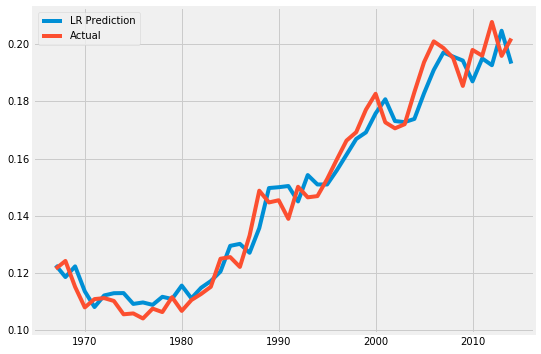

In [77]:
usa_years = data_df[data_df['Country'] == 'United States'].Year.unique()
plt.figure(figsize=(8, 6))
plt.plot(usa_years, preds)
plt.plot(usa_years, y_usa)

plt.legend(['LR Prediction', 'Actual'], loc='upper left')

plt.show()